In [1]:
import pandas as pd

In [2]:
dt=pd.read_csv("/content/AppleProductssales.csv")

In [3]:
dt.head()

,ID,Store_id,Store_Type,Apple_products,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,MacBookAir,R1,01-01-2018,1,Yes,9,7011.84
1,T1000002,253,S4,Airpods,R1,01-01-2018,1,Yes,60,51789.12
2,T1000003,252,S3,Airpods,R1,01-01-2018,1,Yes,42,36868.20
3,T1000004,251,S2,MacBookAir,R1,01-01-2018,1,Yes,23,19715.16
4,T1000005,250,S2,MacBookAir,R4,01-01-2018,1,Yes,62,45614.52


In [4]:
dt.dtypes

ID                 object
Store_id            int64
Store_Type         object
Apple_products     object
Region_Code        object
Date               object
Holiday             int64
Discount           object
#Order              int64
Sales             float64
dtype: object

In [5]:
dt.shape

(188340, 10)

In [6]:
final_dt=dt[["Apple_products","Date","Sales"]]

In [7]:
final_dt.head()

,Apple_products,Date,Sales
0,MacBookAir,01-01-2018,7011.84
1,Airpods,01-01-2018,51789.12
2,Airpods,01-01-2018,36868.20
3,MacBookAir,01-01-2018,19715.16
4,MacBookAir,01-01-2018,45614.52


In [8]:
final_dt['Date']=pd.to_datetime(final_dt['Date'])

<ipython-input-8-22b174d971dc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  final_dt['Date']=pd.to_datetime(final_dt['Date'])
<ipython-input-8-22b174d971dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dt['Date']=pd.to_datetime(final_dt['Date'])


In [9]:
final_dt['Apple_products']=final_dt['Apple_products'].astype("category")

<ipython-input-9-8b60b3ea8598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dt['Apple_products']=final_dt['Apple_products'].astype("category")


In [10]:
final_dt.dtypes

Apple_products          category
Date              datetime64[ns]
Sales                    float64
dtype: object

In [11]:
df=final_dt.set_index("Date")

In [12]:
df.head()

,Apple_products,Sales
Date,,
2018-01-01,MacBookAir,7011.84
2018-01-01,Airpods,51789.12
2018-01-01,Airpods,36868.20
2018-01-01,MacBookAir,19715.16
2018-01-01,MacBookAir,45614.52


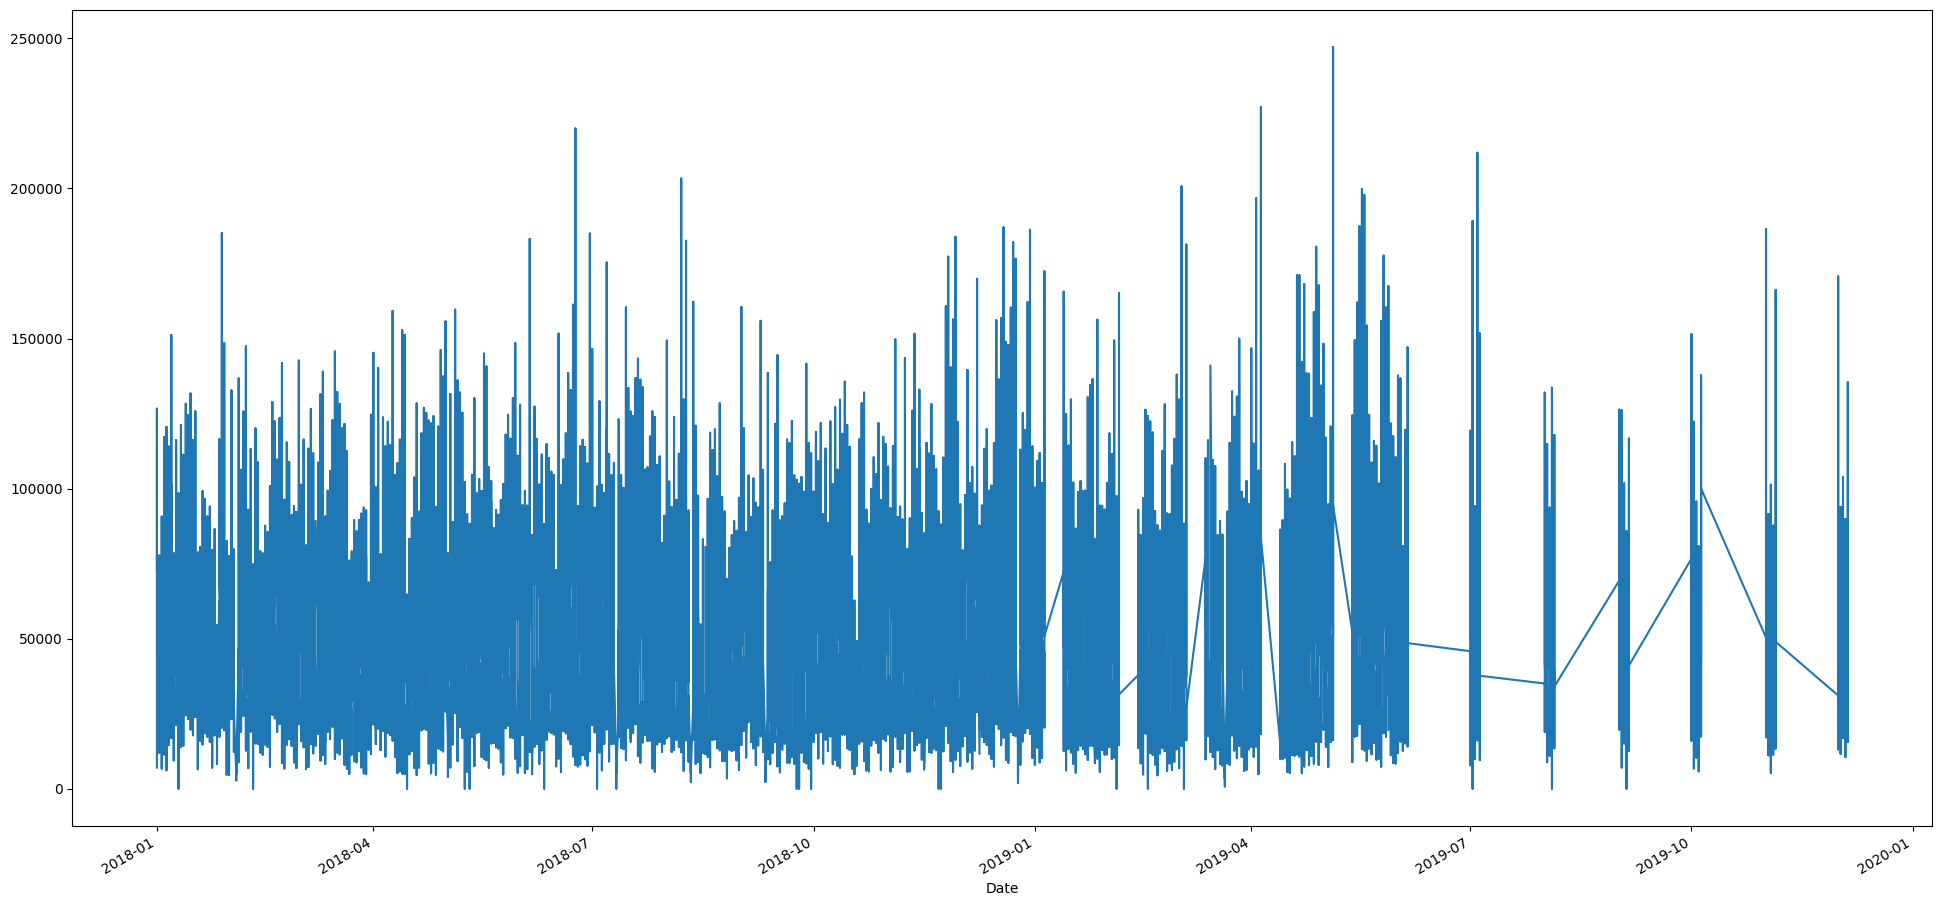

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
df.Sales.plot()
plt.show()

In [14]:
df.isnull().sum().sum()

0

In [17]:
airpods_data = df[df['Apple_products'] == 'Airpods']

In [18]:
airpods_data.head()

,Apple_products,Sales
Date,,
2018-01-01,Airpods,51789.12
2018-01-01,Airpods,36868.20
2018-01-01,Airpods,35352.66
2018-01-01,Airpods,52650.00
2018-01-01,Airpods,42633.78


In [19]:
MacBookAir_data = df[df['Apple_products'] == 'MacBookAir']

In [20]:
Applewatch_data = df[df['Apple_products'] == 'Applewatch']

All four forecasting method for Apple product Airpods

Moving Average with window size 4

In [21]:
airpods_data['MA']=airpods_data['Sales'].rolling(window=4).mean()

<ipython-input-21-15976083b837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airpods_data['MA']=airpods_data['Sales'].rolling(window=4).mean()


Weighted Moving Average with window size 4 and weight 0.1,0.2,0.3,0.4 respectively.

In [23]:
airpods_data['WMA']=airpods_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)

<ipython-input-23-3bb78e90f4e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airpods_data['WMA']=airpods_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)


Naive Approach for the product Airpods

In [24]:
airpods_data['Naive_Forecast']=airpods_data['Sales'].shift(1)

<ipython-input-24-c72011ae3e6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airpods_data['Naive_Forecast']=airpods_data['Sales'].shift(1)


Exponential smoothing with the value of alpha = 0.5

In [25]:
airpods_data['expo_forecast']=airpods_data['Sales'].ewm(alpha=0.5, adjust=False).mean()

<ipython-input-25-5e83cf5dcf7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airpods_data['expo_forecast']=airpods_data['Sales'].ewm(alpha=0.5, adjust=False).mean()


In [26]:
airpods_data.head()

,Apple_products,Sales,MA,WMA,Naive_Forecast,expo_forecast
Date,,,,,,
2018-01-01,Airpods,51789.12,NaN,NaN,NaN,51789.120
2018-01-01,Airpods,36868.20,NaN,NaN,51789.12,44328.660
2018-01-01,Airpods,35352.66,NaN,NaN,36868.20,39840.660
2018-01-01,Airpods,52650.00,44164.995,44218.350,35352.66,46245.330
2018-01-01,Airpods,42633.78,41876.160,43605.864,52650.00,44439.555


In [30]:
airpods_data=airpods_data.fillna(value=0)

In [31]:
airpods_data.head()

,Apple_products,Sales,MA,WMA,Naive_Forecast,expo_forecast
Date,,,,,,
2018-01-01,Airpods,51789.12,0.000,0.000,0.00,51789.120
2018-01-01,Airpods,36868.20,0.000,0.000,51789.12,44328.660
2018-01-01,Airpods,35352.66,0.000,0.000,36868.20,39840.660
2018-01-01,Airpods,52650.00,44164.995,44218.350,35352.66,46245.330
2018-01-01,Airpods,42633.78,41876.160,43605.864,52650.00,44439.555


In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
def evaluate_forecast(actual_values, forecast_values):

    RSFE = np.sum(actual_values - forecast_values)
    MAE = mean_absolute_error(actual_values, forecast_values)
    MSE = mean_squared_error(actual_values, forecast_values)
    RMSE = np.sqrt(MSE)
    mask = actual_values != 0
    MAPE = np.mean(np.abs((actual_values[mask] - forecast_values[mask]) / actual_values[mask])) * 100
    MPE = np.mean((actual_values[mask] - forecast_values[mask]) / actual_values[mask]) * 100

    evaluation_metrics = {
        'RSFE': RSFE,
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE,
        'MAPE': MAPE,
        'MPE': MPE
    }

    return evaluation_metrics

Computing All errors for Airpods for all mentioned forecasting method.  

In [36]:
MA_AP_evaluation =evaluate_forecast(airpods_data['Sales'],airpods_data['MA'])
print(MA_AP_evaluation)

{'RSFE': 132821.21999924124, 'MAE': 10036.236780439078, 'MSE': 184727259.36256495, 'RMSE': 13591.440665454305, 'MAPE': 22.47625323631682, 'MPE': -7.336919354912669}


In [37]:
WMA_AP_evaluation =evaluate_forecast(airpods_data['Sales'],airpods_data['WMA'])
print(WMA_AP_evaluation)

{'RSFE': 129551.19899983326, 'MAE': 8177.000215699918, 'MSE': 123136580.3515961, 'RMSE': 11096.692315802764, 'MAPE': 18.28204036134868, 'MPE': -5.863875248236467}


In [38]:
Naive_AP_evaluation =evaluate_forecast(airpods_data['Sales'],airpods_data['Naive_Forecast'])
print(Naive_AP_evaluation)

{'RSFE': 37977.000000000386, 'MAE': 16228.865206967763, 'MSE': 493332974.8772722, 'RMSE': 22211.100262645075, 'MAPE': 35.94334602489913, 'MPE': -9.770551580458866}


In [39]:
Expo_AP_evaluation =evaluate_forecast(airpods_data['Sales'],airpods_data['expo_forecast'])
print(Expo_AP_evaluation)

{'RSFE': -6511.4689562068015, 'MAE': 6667.075914663715, 'MSE': 82100402.79480112, 'RMSE': 9060.9272591055, 'MAPE': 14.918333497173016, 'MPE': -4.891644949963952}


All four forecasting method for Apple product MacBookAir

In [40]:
MacBookAir_data['MA']=MacBookAir_data['Sales'].rolling(window=4).mean()
MacBookAir_data['WMA']=MacBookAir_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)
MacBookAir_data['Naive_forecast']=MacBookAir_data['Sales'].shift(1)
MacBookAir_data['Expo_forecast']=MacBookAir_data['Sales'].ewm(alpha=0.5, adjust=False).mean()

<ipython-input-40-cb2d085b2942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MacBookAir_data['MA']=MacBookAir_data['Sales'].rolling(window=4).mean()
<ipython-input-40-cb2d085b2942>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MacBookAir_data['WMA']=MacBookAir_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)
<ipython-input-40-cb2d085b2942>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [41]:
MacBookAir_data.head()

,Apple_products,Sales,MA,WMA,Naive_forecast,Expo_forecast
Date,,,,,,
2018-01-01,MacBookAir,7011.84,NaN,NaN,NaN,7011.8400
2018-01-01,MacBookAir,19715.16,NaN,NaN,7011.84,13363.5000
2018-01-01,MacBookAir,45614.52,NaN,NaN,19715.16,29489.0100
2018-01-01,MacBookAir,34211.22,26638.1850,32013.060,45614.52,31850.1150
2018-01-01,MacBookAir,44858.67,36099.8925,39301.254,34211.22,38354.3925


In [42]:
MacBookAir_data=MacBookAir_data.fillna(value=0)

In [43]:
MacBookAir_data.head()

,Apple_products,Sales,MA,WMA,Naive_forecast,Expo_forecast
Date,,,,,,
2018-01-01,MacBookAir,7011.84,0.0000,0.000,0.00,7011.8400
2018-01-01,MacBookAir,19715.16,0.0000,0.000,7011.84,13363.5000
2018-01-01,MacBookAir,45614.52,0.0000,0.000,19715.16,29489.0100
2018-01-01,MacBookAir,34211.22,26638.1850,32013.060,45614.52,31850.1150
2018-01-01,MacBookAir,44858.67,36099.8925,39301.254,34211.22,38354.3925


Computing All errors for MacBookAir for all mentioned forecasting method.

In [44]:
MA_Mac_evaluation =evaluate_forecast(MacBookAir_data['Sales'],MacBookAir_data['MA'])
print(MA_Mac_evaluation)

{'RSFE': 74900.90999989942, 'MAE': 5121.075995363556, 'MSE': 47625146.52807546, 'RMSE': 6901.097487217193, 'MAPE': 17.589990103091406, 'MPE': -4.889519404612412}


In [45]:
WMA_Mac_evaluation =evaluate_forecast(MacBookAir_data['Sales'],MacBookAir_data['WMA'])
print(WMA_Mac_evaluation)

{'RSFE': 70923.97199996597, 'MAE': 4170.032808360317, 'MSE': 31653944.605141323, 'RMSE': 5626.183840325636, 'MAPE': 14.287858396539772, 'MPE': -3.889916841089459}


In [46]:
Naive_Mac_evaluation =evaluate_forecast(MacBookAir_data['Sales'],MacBookAir_data['Naive_forecast'])
print(Naive_Mac_evaluation)

{'RSFE': 31624.560000000118, 'MAE': 8239.268236679422, 'MSE': 125457539.90943147, 'RMSE': 11200.783004300703, 'MAPE': 27.864994074940412, 'MPE': -6.412564340709946}


In [47]:
Expo_Mac_evaluation =evaluate_forecast(MacBookAir_data['Sales'],MacBookAir_data['Expo_forecast'])
print(Expo_Mac_evaluation)

{'RSFE': 24867.1091014526, 'MAE': 3400.4911653229633, 'MSE': 21059836.43257428, 'RMSE': 4589.099740970366, 'MAPE': 11.670801490675826, 'MPE': -3.2540300373288957}


All four forecasting method for Apple product AppleWatch

In [48]:
Applewatch_data['MA']=Applewatch_data['Sales'].rolling(window=4).mean()
Applewatch_data['WMA']=Applewatch_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)
Applewatch_data['Naive_forecast']=Applewatch_data['Sales'].shift(1)
Applewatch_data['Expo_forecast']=Applewatch_data['Sales'].ewm(alpha=0.5, adjust=False).mean()

<ipython-input-48-db194fc037c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Applewatch_data['MA']=Applewatch_data['Sales'].rolling(window=4).mean()
<ipython-input-48-db194fc037c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Applewatch_data['WMA']=Applewatch_data['Sales'].rolling(window=4).apply(lambda x: (x * [0.1, 0.2, 0.3, 0.4]).sum(), raw=True)
<ipython-input-48-db194fc037c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [49]:
Applewatch_data.head()

,Apple_products,Sales,MA,WMA,Naive_forecast,Expo_forecast
Date,,,,,,
2018-01-01,Applewatch,39193.20,NaN,NaN,NaN,39193.200000
2018-01-01,Applewatch,32964.75,NaN,NaN,39193.20,36078.975000
2018-01-01,Applewatch,42340.38,NaN,NaN,32964.75,39209.677500
2018-01-01,Applewatch,47752.20,40562.6325,42315.264,42340.38,43480.938750
2018-01-01,Applewatch,52985.88,44010.8025,47284.563,47752.20,48233.409375


In [50]:
Applewatch_data=Applewatch_data.fillna(value=0)

In [51]:
Applewatch_data.head()

,Apple_products,Sales,MA,WMA,Naive_forecast,Expo_forecast
Date,,,,,,
2018-01-01,Applewatch,39193.20,0.0000,0.000,0.00,39193.200000
2018-01-01,Applewatch,32964.75,0.0000,0.000,39193.20,36078.975000
2018-01-01,Applewatch,42340.38,0.0000,0.000,32964.75,39209.677500
2018-01-01,Applewatch,47752.20,40562.6325,42315.264,42340.38,43480.938750
2018-01-01,Applewatch,52985.88,44010.8025,47284.563,47752.20,48233.409375


Computing All errors for AppleWatch for all mentioned forecasting method.

In [52]:
MA_APPW_evaluation =evaluate_forecast(Applewatch_data['Sales'],Applewatch_data['MA'])
print(MA_APPW_evaluation)

{'RSFE': 97281.02999999042, 'MAE': 4793.385936692505, 'MSE': 39782258.991749585, 'RMSE': 6307.317892079769, 'MAPE': 22.941172298040396, 'MPE': -8.100365744315168}


In [53]:
WMA_APPW_evaluation =evaluate_forecast(Applewatch_data['Sales'],Applewatch_data['WMA'])
print(WMA_APPW_evaluation)

{'RSFE': 102784.78799999063, 'MAE': 3912.0412149009476, 'MSE': 26614185.387640353, 'RMSE': 5158.893814340469, 'MAPE': 18.628164026294268, 'MPE': -6.450715076806492}


In [54]:
Naive_APPW_evaluation =evaluate_forecast(Applewatch_data['Sales'],Applewatch_data['Naive_forecast'])
print(Naive_APPW_evaluation)

{'RSFE': 27760.080000000038, 'MAE': 7802.333044788976, 'MSE': 104861588.35019988, 'RMSE': 10240.194741810328, 'MAPE': 36.20687519609348, 'MPE': -10.642763588183925}


In [55]:
Expo_APPW_evaluation =evaluate_forecast(Applewatch_data['Sales'],Applewatch_data['Expo_forecast'])
print(Expo_APPW_evaluation)

{'RSFE': -11040.246681757155, 'MAE': 3191.0444465472915, 'MSE': 17568909.19830054, 'RMSE': 4191.528265239367, 'MAPE': 15.282571405687694, 'MPE': -5.43359102415117}
